In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [2]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)


In [3]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax



In [4]:
file_name = "Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
df = pd.read_csv(file_name)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


RegionID  SizeRank      RegionName RegionType StateName State  \
0          6181         0        New York       city        NY    NY   
1         12447         1     Los Angeles       city        CA    CA   
2         39051         2         Houston       city        TX    TX   
3         17426         3         Chicago       city        IL    IL   
4          6915         4     San Antonio       city        TX    TX   
...         ...       ...             ...        ...       ...   ...   
22462    236350     28439       Palisades       city        TX    TX   
22463     40403     28439  Port Mansfield       city        TX    TX   
22464     54740     28439     Tribes Hill       city        NY    NY   
22465    249186     28439    Derby Center       city        VT    VT   
22466     42575     28439        Quinwood       city        WV    WV   

                                       Metro          CountyName  2000-01-31  \
0      New York-Newark-Jersey City, NY-NJ-PA       Queens County    253690.0   
1         Los Angeles-Long Beach-Anaheim, CA  Los Angeles County    234181.0   
2       Houston-The Woodlands-Sugar Land, TX       Harris County    109068.0   
3         Chicago-Naperville-Elgin, IL-IN-WI         Cook County    166139.0   
4              San Antonio-New Braunfels, TX        Bexar County    114794.0   
...                                      ...                 ...         ...   
22462                           Amarillo, TX      Randall County         NaN   
22463                       Raymondville, TX      Willacy County         NaN   
22464                          Amsterdam, NY   Montgomery County     53380.0   
22465                                    NaN      Orleans County         NaN   
22466                                    NaN   Greenbrier County         NaN   

       2000-02-29  ...  2021-12-31  2022-01-31  2022-02-28  2022-03-31  \
0        255517.0  ...    741586.0    745686.0    750578.0    756734.0   
1        234401.0  ...    924019.0    928991.0    937936.0    953874.0   
2        109079.0  ...    245783.0    248718.0    252080.0    256435.0   
3        166536.0  ...    302821.0    305104.0    306404.0    308303.0   
4        114975.0  ...    269323.0    274032.0    278464.0    284127.0   
...           ...  ...         ...         ...         ...         ...   
22462         NaN  ...    198490.0    198467.0    196420.0    192002.0   
22463         NaN  ...    229251.0    232984.0    238245.0    240154.0   
22464     53662.0  ...    132490.0    134951.0    137470.0    137430.0   
22465         NaN  ...         NaN         NaN         NaN         NaN   
22466         NaN  ...     38005.0     38210.0     38186.0     38205.0   

       2022-04-30  2022-05-31  2022-06-30  2022-07-31  2022-08-31  2022-09-30  
0        762321.0    768797.0    773944.0    777692.0    779960.0    781622.0  
1        973168.0    990391.0    992337.0    992630.0    978196.0    966595.0  
2        261101.0    265558.0    268901.0    271059.0    272400.0    272639.0  
3        309649.0    312487.0    314663.0    315910.0    315587.0    315429.0  
4        289739.0    294776.0    297727.0    298796.0    299124.0    298951.0  
...           ...         ...         ...         ...         ...         ...  
22462    191634.0    189383.0    191134.0    191343.0    192384.0    192110.0  
22463    242470.0    243119.0    249098.0    255572.0    261910.0    264685.0  
22464    137413.0    137615.0    138908.0    140096.0    141573.0    142438.0  
22465         NaN         NaN    258191.0    261607.0    264571.0    266255.0  
22466     38308.0     38845.0     38847.0     39158.0     38956.0     40331.0  

[22467 rows x 281 columns]

In [5]:
#looking at columns only
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [6]:
df2 = df.copy()

In [7]:
df2 = df["SizeRank"] > 3
df2

0        False
1        False
2        False
3        False
4         True
         ...  
22462     True
22463     True
22464     True
22465     True
22466     True
Name: SizeRank, Length: 22467, dtype: bool

In [8]:
df_filtered = df[~df2]
df_filtered

RegionID  SizeRank   RegionName RegionType StateName State  \
0      6181         0     New York       city        NY    NY   
1     12447         1  Los Angeles       city        CA    CA   
2     39051         2      Houston       city        TX    TX   
3     17426         3      Chicago       city        IL    IL   

                                   Metro          CountyName  2000-01-31  \
0  New York-Newark-Jersey City, NY-NJ-PA       Queens County    253690.0   
1     Los Angeles-Long Beach-Anaheim, CA  Los Angeles County    234181.0   
2   Houston-The Woodlands-Sugar Land, TX       Harris County    109068.0   
3     Chicago-Naperville-Elgin, IL-IN-WI         Cook County    166139.0   

   2000-02-29  ...  2021-12-31  2022-01-31  2022-02-28  2022-03-31  \
0    255517.0  ...    741586.0    745686.0    750578.0    756734.0   
1    234401.0  ...    924019.0    928991.0    937936.0    953874.0   
2    109079.0  ...    245783.0    248718.0    252080.0    256435.0   
3    166536.0  ...    302821.0    305104.0    306404.0    308303.0   

   2022-04-30  2022-05-31  2022-06-30  2022-07-31  2022-08-31  2022-09-30  
0    762321.0    768797.0    773944.0    777692.0    779960.0    781622.0  
1    973168.0    990391.0    992337.0    992630.0    978196.0    966595.0  
2    261101.0    265558.0    268901.0    271059.0    272400.0    272639.0  
3    309649.0    312487.0    314663.0    315910.0    315587.0    315429.0  

[4 rows x 281 columns]

In [9]:
filtered = df_filtered["RegionName"]
filtered

0       New York
1    Los Angeles
2        Houston
3        Chicago
Name: RegionName, dtype: object

In [10]:
melted_df = pd.melt(df,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],value_name='Confirmed',var_name="Date")
melted_df

RegionID  SizeRank      RegionName RegionType StateName State  \
0            6181         0        New York       city        NY    NY   
1           12447         1     Los Angeles       city        CA    CA   
2           39051         2         Houston       city        TX    TX   
3           17426         3         Chicago       city        IL    IL   
4            6915         4     San Antonio       city        TX    TX   
...           ...       ...             ...        ...       ...   ...   
6133486    236350     28439       Palisades       city        TX    TX   
6133487     40403     28439  Port Mansfield       city        TX    TX   
6133488     54740     28439     Tribes Hill       city        NY    NY   
6133489    249186     28439    Derby Center       city        VT    VT   
6133490     42575     28439        Quinwood       city        WV    WV   

                                         Metro          CountyName  \
0        New York-Newark-Jersey City, NY-NJ-PA       Queens County   
1           Los Angeles-Long Beach-Anaheim, CA  Los Angeles County   
2         Houston-The Woodlands-Sugar Land, TX       Harris County   
3           Chicago-Naperville-Elgin, IL-IN-WI         Cook County   
4                San Antonio-New Braunfels, TX        Bexar County   
...                                        ...                 ...   
6133486                           Amarillo, TX      Randall County   
6133487                       Raymondville, TX      Willacy County   
6133488                          Amsterdam, NY   Montgomery County   
6133489                                    NaN      Orleans County   
6133490                                    NaN   Greenbrier County   

               Date  Confirmed  
0        2000-01-31   253690.0  
1        2000-01-31   234181.0  
2        2000-01-31   109068.0  
3        2000-01-31   166139.0  
4        2000-01-31   114794.0  
...             ...        ...  
6133486  2022-09-30   192110.0  
6133487  2022-09-30   264685.0  
6133488  2022-09-30   142438.0  
6133489  2022-09-30   266255.0  
6133490  2022-09-30    40331.0  

[6133491 rows x 10 columns]

In [11]:
melted_df['Date'] = pd.to_datetime(melted_df['Date'])
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133491 entries, 0 to 6133490
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionID    int64         
 1   SizeRank    int64         
 2   RegionName  object        
 3   RegionType  object        
 4   StateName   object        
 5   State       object        
 6   Metro       object        
 7   CountyName  object        
 8   Date        datetime64[ns]
 9   Confirmed   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 467.9+ MB


In [12]:
melted_df = melted_df.set_index("Date")
melted_df

RegionID  SizeRank      RegionName RegionType StateName State  \
Date                                                                        
2000-01-31      6181         0        New York       city        NY    NY   
2000-01-31     12447         1     Los Angeles       city        CA    CA   
2000-01-31     39051         2         Houston       city        TX    TX   
2000-01-31     17426         3         Chicago       city        IL    IL   
2000-01-31      6915         4     San Antonio       city        TX    TX   
...              ...       ...             ...        ...       ...   ...   
2022-09-30    236350     28439       Palisades       city        TX    TX   
2022-09-30     40403     28439  Port Mansfield       city        TX    TX   
2022-09-30     54740     28439     Tribes Hill       city        NY    NY   
2022-09-30    249186     28439    Derby Center       city        VT    VT   
2022-09-30     42575     28439        Quinwood       city        WV    WV   

                                            Metro          CountyName  \
Date                                                                    
2000-01-31  New York-Newark-Jersey City, NY-NJ-PA       Queens County   
2000-01-31     Los Angeles-Long Beach-Anaheim, CA  Los Angeles County   
2000-01-31   Houston-The Woodlands-Sugar Land, TX       Harris County   
2000-01-31     Chicago-Naperville-Elgin, IL-IN-WI         Cook County   
2000-01-31          San Antonio-New Braunfels, TX        Bexar County   
...                                           ...                 ...   
2022-09-30                           Amarillo, TX      Randall County   
2022-09-30                       Raymondville, TX      Willacy County   
2022-09-30                          Amsterdam, NY   Montgomery County   
2022-09-30                                    NaN      Orleans County   
2022-09-30                                    NaN   Greenbrier County   

            Confirmed  
Date                   
2000-01-31   253690.0  
2000-01-31   234181.0  
2000-01-31   109068.0  
2000-01-31   166139.0  
2000-01-31   114794.0  
...               ...  
2022-09-30   192110.0  
2022-09-30   264685.0  
2022-09-30   142438.0  
2022-09-30   266255.0  
2022-09-30    40331.0  

[6133491 rows x 9 columns]

In [13]:
# Resampling by monthly frequency
df_ts = melted_df.groupby('RegionName').resample("M").sum()
df_ts

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted_df.groupby('RegionName').resample("M").sum()
C:\Users\caill\AppData\Local\Temp\ipykernel_17664\1834971715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which s

RegionID  SizeRank  Confirmed
RegionName Date                                     
Aaronsburg 2000-01-31     50631     20455        0.0
           2000-02-29     50631     20455        0.0
           2000-03-31     50631     20455        0.0
           2000-04-30     50631     20455        0.0
           2000-05-31     50631     20455        0.0
...                         ...       ...        ...
Zwolle     2022-05-31     55298      9498   139490.0
           2022-06-30     55298      9498   140633.0
           2022-07-31     55298      9498   142156.0
           2022-08-31     55298      9498   143646.0
           2022-09-30     55298      9498   144336.0

[3972423 rows x 3 columns]

In [14]:
df_ts.head().index

MultiIndex([('Aaronsburg', '2000-01-31'),
            ('Aaronsburg', '2000-02-29'),
            ('Aaronsburg', '2000-03-31'),
            ('Aaronsburg', '2000-04-30'),
            ('Aaronsburg', '2000-05-31')],
           names=['RegionName', 'Date'])

In [15]:
cities = ["New York", "Los Angeles", "Houston","Chicago"]
df_ts = df_ts.loc[cities].copy()
df_ts

RegionID  SizeRank  Confirmed
RegionName Date                                     
New York   2000-01-31      6181         0   253690.0
           2000-02-29      6181         0   255517.0
           2000-03-31      6181         0   257207.0
           2000-04-30      6181         0   260310.0
           2000-05-31      6181         0   263204.0
...                         ...       ...        ...
Chicago    2022-05-31     17426         3   312487.0
           2022-06-30     17426         3   314663.0
           2022-07-31     17426         3   315910.0
           2022-08-31     17426         3   315587.0
           2022-09-30     17426         3   315429.0

[1092 rows x 3 columns]

# Part 2

In [16]:
# level 0 is RegionName
df_ts.index.get_level_values(0)

Index(['New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York',
       ...
       'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago'],
      dtype='object', name='RegionName', length=1092)

In [17]:
# level 1 Dates
df_ts.index.get_level_values(1)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [18]:
unstacked_0 = df_ts.unstack(level=0)
unstacked_0

RegionID                             SizeRank                      \
RegionName New York Los Angeles Houston Chicago New York Los Angeles Houston   
Date                                                                           
2000-01-31     6181       12447  286366   17426        0           1  100671   
2000-02-29     6181       12447  286366   17426        0           1  100671   
2000-03-31     6181       12447  286366   17426        0           1  100671   
2000-04-30     6181       12447  286366   17426        0           1  100671   
2000-05-31     6181       12447  286366   17426        0           1  100671   
...             ...         ...     ...     ...      ...         ...     ...   
2022-05-31     6181       12447  286366   17426        0           1  100671   
2022-06-30     6181       12447  286366   17426        0           1  100671   
2022-07-31     6181       12447  286366   17426        0           1  100671   
2022-08-31     6181       12447  286366   17426        0           1  100671   
2022-09-30     6181       12447  286366   17426        0           1  100671   

                   Confirmed                                   
RegionName Chicago  New York Los Angeles    Houston   Chicago  
Date                                                           
2000-01-31       3  253690.0    234181.0   276053.0  166139.0  
2000-02-29       3  255517.0    234401.0   276375.0  166536.0  
2000-03-31       3  257207.0    235513.0   276118.0  167368.0  
2000-04-30       3  260310.0    237589.0   276885.0  168826.0  
2000-05-31       3  263204.0    240113.0   277621.0  170499.0  
...            ...       ...         ...        ...       ...  
2022-05-31       3  768797.0    990391.0  2044984.0  312487.0  
2022-06-30       3  773944.0    992337.0  2065197.0  314663.0  
2022-07-31       3  777692.0    992630.0  2081207.0  315910.0  
2022-08-31       3  779960.0    978196.0  2097091.0  315587.0  
2022-09-30       3  781622.0    966595.0  2107240.0  315429.0  

[273 rows x 12 columns]

In [19]:
def plot_compare_cols(df_ts,col1='Confirmed',color1='#3b81db',
                      color2='orange',
                     ylabel1="# Thousands of Dollars",
                     figsize=(12,5)):

    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(df_ts.index, df_ts[col1] ,color=color1,label=col1.title())
    ax1.set_ylabel(ylabel1)
    # Make twin axis
    ax2 = ax1.twinx()
    ax2.plot(df_ts.index ,df_ts[col2],label=col2.title(),color=color2)
    ## Removing the grids
    ax1.grid(False)
    ax2.grid(False)
    ## Making joined legend
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [l.get_label() for l in lines]
    ax2.legend(lines, labels, loc=0);
    fig.autofmt_xdate()
    return fig, (ax1,ax2)



In [20]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Creating the formatters
fmt_thous = mticks.FuncFormatter(thousands)


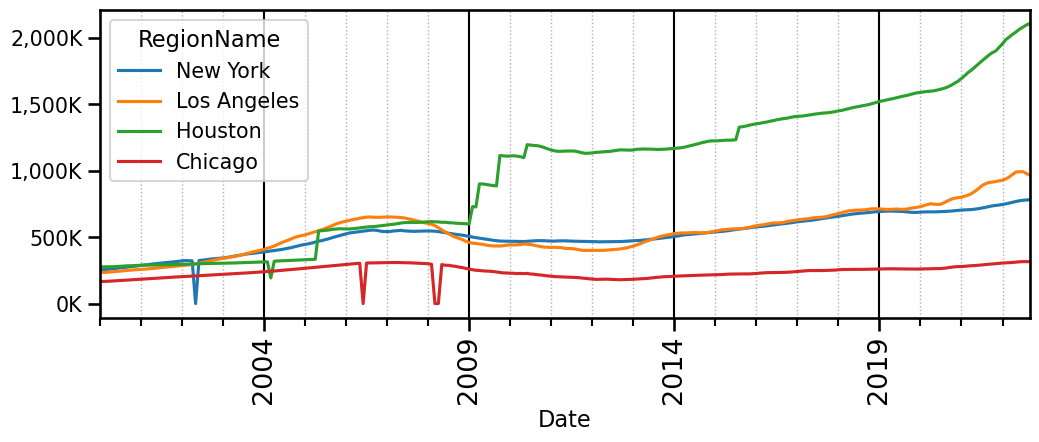

In [21]:
ax = unstacked_0['Confirmed'].plot()
ax.set_xlim(left=pd.to_datetime('01/2000'))
ax.yaxis.set_major_formatter(fmt_thous)
ax.grid(which='minor',axis='x',ls=":",lw=1)
ax.grid(which='major',axis='x',color='k')
ax.xaxis.set_tick_params(labelsize="large", rotation=90, bottom=True)

# 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [22]:
confirmed = unstacked_0['Confirmed']

In [23]:
plot_ts = confirmed['01/2008':'12/2008']
plot_ts

RegionName  New York  Los Angeles   Houston   Chicago
Date                                                 
2008-01-31  546538.0     603029.0  615592.0  300207.0
2008-02-29  546098.0     596635.0  617117.0  296063.0
2008-03-31  544562.0     586065.0  615299.0       0.0
2008-04-30  541865.0     571226.0  614689.0       0.0
2008-05-31  537685.0     554589.0  611766.0  293467.0
2008-06-30  533810.0     539622.0  612235.0  288495.0
2008-07-31  529211.0     524220.0  608788.0  288174.0
2008-08-31  525290.0     510520.0  607635.0  283199.0
2008-09-30  521347.0     500124.0  605000.0  280695.0
2008-10-31  518048.0     490979.0  603544.0  274849.0
2008-11-30  514767.0     481905.0  602602.0  271059.0
2008-12-31  510309.0     469294.0  601194.0  265306.0

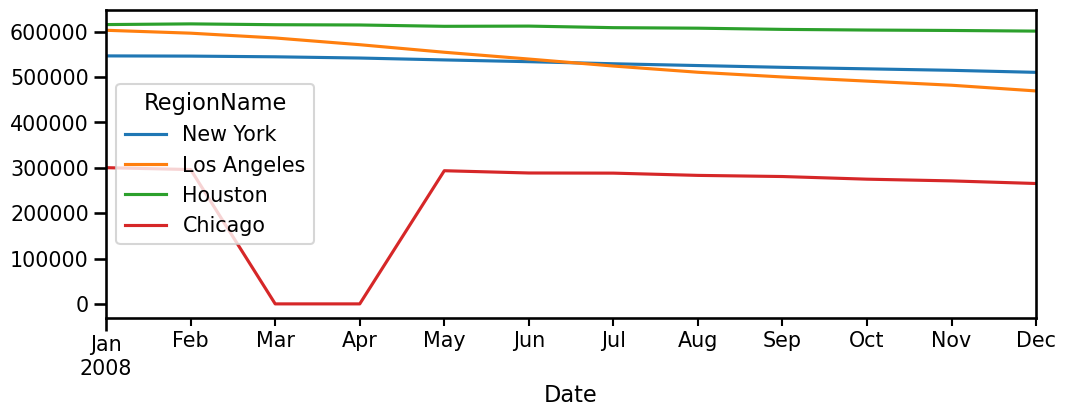

In [24]:
plot_ts.plot();

In [25]:
plot_ts.max().sort_values(ascending=False)

RegionName
Houston        617117.0
Los Angeles    603029.0
New York       546538.0
Chicago        300207.0
dtype: float64

- Houston had to highest home values in 2008.
- Chicago had to lowest home values in 2008.

# 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [29]:
ts_diff = confirmed.diff()
ts_diff

RegionName  New York  Los Angeles  Houston  Chicago
Date                                               
2000-01-31       NaN          NaN      NaN      NaN
2000-02-29    1827.0        220.0    322.0    397.0
2000-03-31    1690.0       1112.0   -257.0    832.0
2000-04-30    3103.0       2076.0    767.0   1458.0
2000-05-31    2894.0       2524.0    736.0   1673.0
...              ...          ...      ...      ...
2022-05-31    6476.0      17223.0  17488.0   2838.0
2022-06-30    5147.0       1946.0  20213.0   2176.0
2022-07-31    3748.0        293.0  16010.0   1247.0
2022-08-31    2268.0     -14434.0  15884.0   -323.0
2022-09-30    1662.0     -11601.0  10149.0   -158.0

[273 rows x 4 columns]

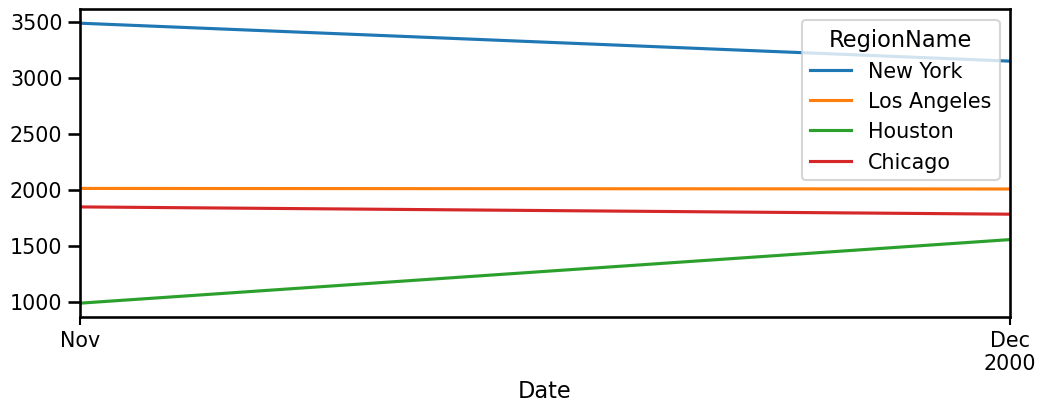

In [34]:
plot_diff = ts_diff.loc['11/2000':'12/2000'].copy().dropna()
plot_diff.plot();

In [44]:
plot_diff

RegionName  New York  Los Angeles  Houston  Chicago
Date                                               
2000-11-30    3486.0       2010.0    985.0   1845.0
2000-12-31    3147.0       2005.0   1553.0   1780.0

In [45]:
plot_diff2 = plot_diff.diff(-1)
plot_diff2

RegionName  New York  Los Angeles  Houston  Chicago
Date                                               
2000-11-30     339.0          5.0   -568.0     65.0
2000-12-31       NaN          NaN      NaN      NaN

- Differences from 11/2000 - 12/2000:
    - New York: Decreased by $339.00
    
    - Los Angeles: Decreased by $5.00
    
    - Houston: Increased by $568.00
    
    - Chicago: Decreased by $65.00